# 

# CLEANTECH SOLAR – INTERNSHIP ASSIGNMENT

# 

# 

# Import library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (24,14)

# 

# Import data

In [2]:
data = pd.read_excel('D:/Interview Question/Cleantech Solar/Assignment_dataset.xlsx')

In [3]:
data

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


# 

In [7]:
# Added Budget column and put the value of budget according to the file

conditions = [
    (data['Date'] >= pd.to_datetime('2019-07-01')) & (data['Date'] <= pd.to_datetime('2020-06-30')),
    (data['Date'] >= pd.to_datetime('2020-07-01')) & (data['Date'] <= pd.to_datetime('2021-06-30')),
    (data['Date'] >= pd.to_datetime('2021-07-01'))
]

values = [73.9, 73.3, 72.7]

data['Budget'] = np.select(conditions, values)

print(data)

          Date       GHI         PR  Budget
0   2019-07-01  3.256608  69.575676    73.9
1   2019-07-02  3.976767  79.314411    73.9
2   2019-07-03  2.811867  61.020006    73.9
3   2019-07-04  3.658408  83.262576    73.9
4   2019-07-05  5.590683  82.124440    73.9
..         ...       ...        ...     ...
977 2022-03-20  4.226183  81.632738    72.7
978 2022-03-21  3.431675  71.057353    72.7
979 2022-03-22  3.580492  81.631509    72.7
980 2022-03-23  4.997617  71.906149    72.7
981 2022-03-24  5.125050  79.911798    72.7

[982 rows x 4 columns]


# 

In [8]:
# Check sample of data

data.sample(10)

,Date,GHI,PR,Budget
405,2020-08-09,3.826892,66.909404,73.3
96,2019-10-05,5.760425,76.601606,73.9
545,2020-12-27,4.482958,66.817594,73.3
785,2021-09-09,4.021167,62.489411,72.7
658,2021-05-03,2.331000,64.921613,73.3
242,2020-02-28,6.122650,64.565958,73.9
67,2019-09-06,5.574542,66.407012,73.9
430,2020-09-03,5.022025,79.114948,73.3
954,2022-02-25,5.246500,72.013223,72.7
506,2020-11-18,3.887517,69.816647,73.3


# 

In [9]:
# Check the value count of Budget column

data['Budget'].value_counts()

73.9    366
73.3    349
72.7    267
Name: Budget, dtype: int64

# 

In [14]:
# Check the how many data are above the budget


count = 0

for i in range(981):
    if (data.PR[i] > data.Budget[i]):
        count+=1
        
print(count)

475


# 

In [26]:
# Find the average PR of last 7 days, 30 days, 60 days, 90 days, 365 days and lifetime


avg_7 = np.mean(data['PR'].tail(7))
print('Average PR of last 7 days :',avg_7)

avg_30 = np.mean(data['PR'].tail(30))
print('Average PR of last 30 days :',avg_30)

avg_60 = np.mean(data['PR'].tail(60))
print('Average PR of last 60 days :',avg_60)

avg_90 = np.mean(data['PR'].tail(90))
print('Average PR of last 90 days :',avg_90)

avg_365 = np.mean(data['PR'].tail(365))
print('Average PR of last 365 days :',avg_365)

avg_lifetime = np.mean(data['PR'])
print('Average PR of Lifetime :',avg_lifetime)

Average PR of last 7 days : 73.80366172456165
Average PR of last 30 days : 71.85599481656264
Average PR of last 60 days : 73.00926396506688
Average PR of last 90 days : 73.0506149065748
Average PR of last 365 days : 72.65386473002852
Average PR of Lifetime : 72.64860790714273


# 

In [16]:
# 30 days Moving average of PR

data['SMA30'] = data['PR'].rolling(30).mean()

In [17]:
data

,Date,GHI,PR,Budget,SMA30
0,2019-07-01,3.256608,69.575676,73.9,NaN
1,2019-07-02,3.976767,79.314411,73.9,NaN
2,2019-07-03,2.811867,61.020006,73.9,NaN
3,2019-07-04,3.658408,83.262576,73.9,NaN
4,2019-07-05,5.590683,82.124440,73.9,NaN
...,...,...,...,...,...
977,2022-03-20,4.226183,81.632738,72.7,71.181262
978,2022-03-21,3.431675,71.057353,72.7,70.789540
979,2022-03-22,3.580492,81.631509,72.7,71.231840
980,2022-03-23,4.997617,71.906149,72.7,71.249772


# 

In [18]:
# Create a dataframe according to GHI

a_2 = data[data.GHI < 2]
a_24 = data[(data.GHI >= 2) & (data.GHI <= 4)]
a_46 = data[(data.GHI >= 4) & (data.GHI <= 6)]
a_6 = data[data.GHI > 6]

# 

# Graph

<Figure size 1728x1008 with 0 Axes>

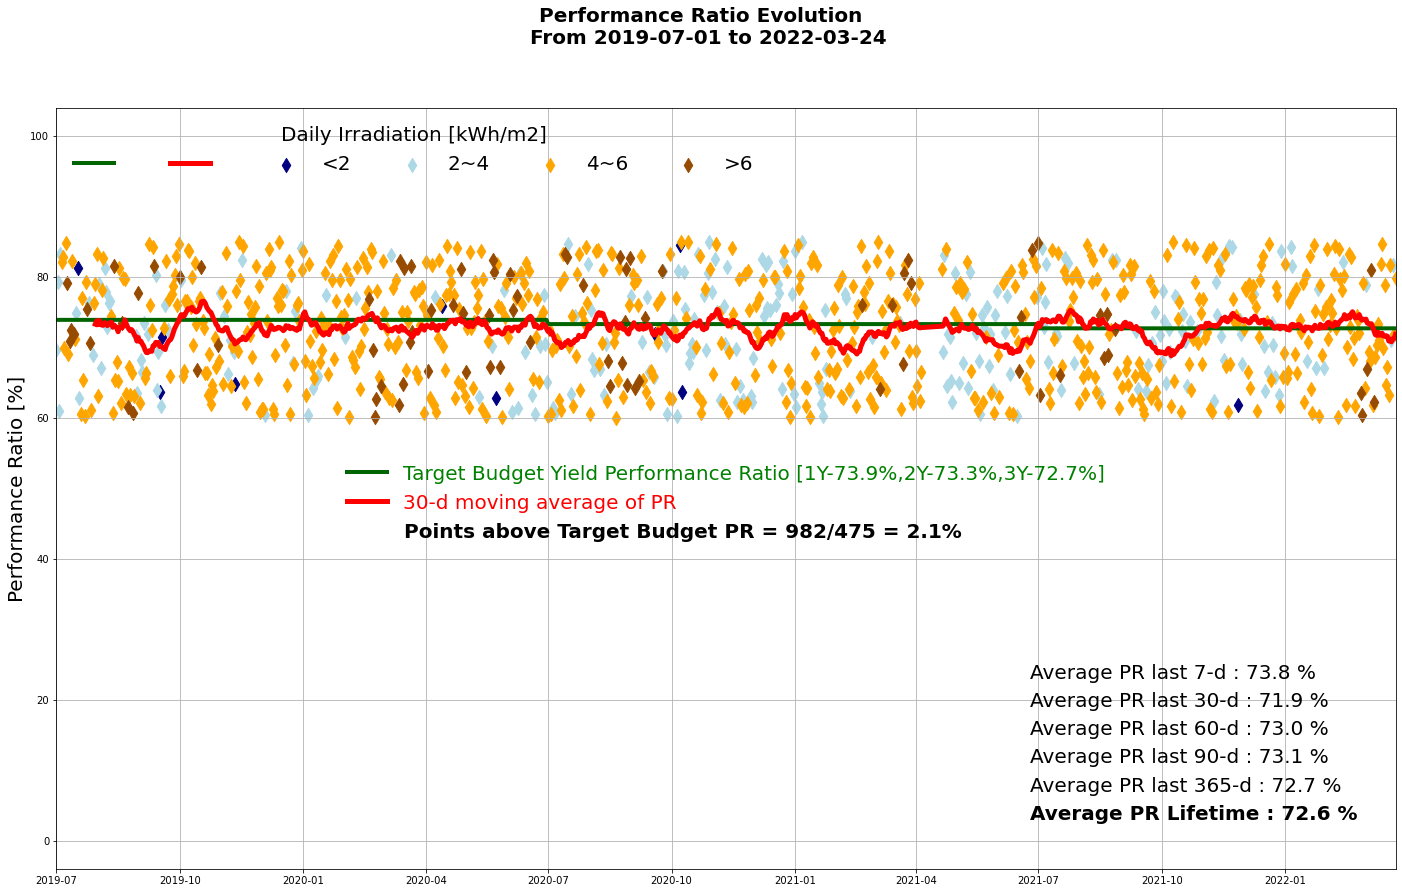

In [25]:
import matplotlib.patches as mpatches

plt.figure()

fig, ax = plt.subplots()

# Scatter plot of Date VS PR

scatter1 = plt.scatter(x = a_2['Date'], y = a_2['PR'], marker='d', s = 100,c = '#000080')
scatter2 = plt.scatter(x = a_24['Date'], y = a_24['PR'], marker='d', s = 100, c = '#ADD8E6')
scatter3 = plt.scatter(x = a_46['Date'], y = a_46['PR'], marker='d', s = 100, c = '#FFA500')
scatter4 = plt.scatter(x = a_6['Date'], y = a_6['PR'], marker='d', s = 100, c = '#964B00')


# Line plot of Date VS Budget

ax.plot(data['Date'], data['Budget'], color = '#006400', linewidth = 4.0)


# Line plot of Date VS 30 days Moving average of PR

ax.plot(data['Date'], data['SMA30'], color = 'r', linewidth = 5.0)


# sets the x-axis limits and y-axis limits for the chart

plt.xlim(xmin = pd.to_datetime('2019-07-01'), xmax = pd.to_datetime('2022-03-24'))
plt.ylim(ymin = -4, ymax = 104)


# Add text to the graph

plt.text(pd.to_datetime('2020-03-16'), 43, 'Points above Target Budget PR = 982/{} = {:.1f}%'.format(count, 982/count), 
         {'weight':'bold'}, fontsize = 20)

plt.text(pd.to_datetime('2021-06-25'), 23, 'Average PR last 7-d : {:.1f} %'.format(avg_7), fontsize = 20)
plt.text(pd.to_datetime('2021-06-25'), 19, 'Average PR last 30-d : {:.1f} %'.format(avg_30), fontsize = 20)
plt.text(pd.to_datetime('2021-06-25'), 15, 'Average PR last 60-d : {:.1f} %'.format(avg_60), fontsize = 20)
plt.text(pd.to_datetime('2021-06-25'), 11, 'Average PR last 90-d : {:.1f} %'.format(avg_90), fontsize = 20)
plt.text(pd.to_datetime('2021-06-25'), 7, 'Average PR last 365-d : {:.1f} %'.format(avg_365), fontsize = 20)
plt.text(pd.to_datetime('2021-06-25'), 3, 'Average PR Lifetime : {:.1f} %'.format(avg_lifetime), {'weight':'bold'}, 
         fontsize = 20)


# Add legend to the graph

lines = plt.gca().get_lines()
legend1 = plt.legend([lines[0], lines[1]],['Target Budget Yield Performance Ratio [1Y-73.9%,2Y-73.3%,3Y-72.7%]', 
                                           '30-d moving average of PR'], loc='center', fontsize = 20, frameon = False)

ax = plt.gca()
leg = ax.get_legend()
leg.get_texts()[0].set_color('Green')
leg.get_texts()[1].set_color('red')

plt.legend(title = 'Daily Irradiation [kWh/m2]', loc = 'upper left', labels = ['', '', '<2', '2~4', '4~6', '>6'], 
           fontsize = 20,  ncol=7, frameon = False, title_fontsize=20)

plt.gca().add_artist(legend1)


# Add grid line in graph

plt.grid()


# Give a label name to the y-axis

plt.ylabel('Performance Ratio [%]', fontsize = 20)
plt.xlabel('')


# Give a title of the graph

fig.suptitle('Performance Ratio Evolution \n From 2019-07-01 to 2022-03-24', fontsize = 20, fontweight = "bold")


# Show the final Graph

plt.show()
print('')

# 

# 

# Thank you so much...